# Behavior1K Loading


We'll analyze BEHAVIOR1k survey data to calculate the average scores for specified tasks. The dataset contains multiple input tasks and corresponding scores. The goal is to compute the average score for each unique task across all responses.

### Steps:

1. **Load the Data:** 
   - The dataset is loaded from a CSV file using the pandas library. Adjust the file path as necessary.

2. **Filter Input Task Columns:**
   - We extract columns that start with `Input.input_task` to identify all task-related columns in the dataset.

3. **Identify Unique Tasks:**
   - We find all unique tasks by stacking the values from the filtered columns and converting them to a set.

4. **Initialize a Dictionary for Sum and Count:**
   - A dictionary is created to store the sum of scores and the count of occurrences for each unique task. This dictionary will help in calculating the average score later.

5. **Accumulate Scores and Count for Each Task:**
   - For each unique task, we find the indices of the rows where the task appears.
   - For each of these rows, we identify the corresponding score column (e.g., `Answer.taskX`) and accumulate the score in our dictionary. We also keep a count of how many times each task appears.

6. **Calculate Average Scores:**
   - Using the accumulated sum and count, we calculate the average score for each task by dividing the total sum by the count of occurrences.

7. **Display the Results:**
   - Finally, we print the average scores for each task for reference.

This approach allows us to systematically analyze the survey data and derive meaningful insights about task performance.


In [3]:
import pandas as pd

# Replace 'your_file.csv' with the path to your actual CSV file
df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/results/main/final_data.csv', header=0)

# # Filter the subset where 'Answer.gender.male' is True
# male_subset_df = df[df['Answer.gender.male'] == True]

# # Save the filtered subset to a new CSV file
# # Replace 'male_subset.csv' with your desired file name and path
# male_subset_df.to_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/gender_male_subset.csv', index=False)


In [8]:
import pandas as pd

# Load the data
# df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/results/main/final_data.csv', header=0)

# Specify the gender flag (e.g., 'male', 'female', 'nb', 'other')
gender_flag = 'female'  # Change this value as needed

# Create a dictionary to map gender flags to column names
gender_columns = {
    'male': 'Answer.gender.male',
    'female': 'Answer.gender.female',
    'nb': 'Answer.gender.nb',
    'other': 'Answer.gender.other'
}

if gender_flag not in gender_columns:
    raise ValueError("Invalid gender flag. Choose from 'male', 'female', 'nb', or 'other'.")

# Filter the subset based on the gender flag
gender_column = gender_columns[gender_flag]
filtered_subset = df[df[gender_column] == True]

# Display the first few rows of the filtered subset
print(filtered_subset)


      index  Unnamed: 0                           HITId  \
0         0           0  3IYI9285XYH14RIDHZGJUZ7ALK1CJC   
1         1           1  3IYI9285XYH14RIDHZGJUZ7ALK1CJC   
4         4           4  3IYI9285XYH14RIDHZGJUZ7ALK1CJC   
6         6           6  3IYI9285XYH14RIDHZGJUZ7ALK1CJC   
16       17          17  3LEG2HW4VL48174F1G0S3O6WGM72FQ   
...     ...         ...                             ...   
1940      2           2  3WGZLY9VDN3MP2S8QRE3PFGEQBWD8A   
1943      6           6  3GITHABAD42KPZHWZ4J5BTF5IF62NE   
1946      9           9  3UEDKCTPA17Q3UTZ838KFSF9Z0N7KU   
1947     10          10  3VI0PC2ZB41380K5O84BG896LYCOXQ   
1948     11          11  37OPIVELV0KHK6QP9LH7CR178RPAHK   

                           HITTypeId                                  Title  \
0     30FN99Y3E1GPFJDFH4QLSQJ4TTK74J  Rate how useful these activities are.   
1     30FN99Y3E1GPFJDFH4QLSQJ4TTK74J  Rate how useful these activities are.   
4     30FN99Y3E1GPFJDFH4QLSQJ4TTK74J  Rate how useful 

In [11]:
import pandas as pd

# Load the data
# data_path = '/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/results/main/final_data.csv'  # Adjust the path accordingly
data_path = '/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/results/main/male_subset.csv'  # Adjust the path accordingly

# data_path = '/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/income_subsets/high_income_subset.csv'  # Adjust the path accordingly

final_data = pd.read_csv(data_path)
# final_data = 

input_task_columns = final_data.filter(regex='^Input.input_task')

# Find the set of all unique tasks in the dataset
unique_tasks = set(input_task_columns.stack().values)

# Initialize a dictionary to store the sum of scores and count of occurrences for the specified tasks
specified_task_sum_and_count = {task: {'sum': 0, 'count': 0} for task in unique_tasks}

# Iterate through each specified task to accumulate scores and count
for task_specific in unique_tasks:
    # Find the indices of the rows where 'Input.input_taskX' is the specified task
    task_specific_indices = final_data[final_data.filter(regex='^Input.input_task').eq(task_specific).any(axis=1)].index

    # Extract the corresponding 'Answer.taskX' scores for these rows
    for idx in task_specific_indices:
        row = final_data.iloc[idx]
        input_columns = row.filter(regex='^Input.input_task')
        answer_columns = row.filter(regex='^Answer.task')
        task_number = input_columns[input_columns == task_specific].index[0].split("task")[-1]
        answer_column_name = f"Answer.task{task_number}"
        specified_task_sum_and_count[task_specific]['sum'] += row[answer_column_name]
        specified_task_sum_and_count[task_specific]['count'] += 1

# Calculate the average score for each specified task
specified_task_avg_scores = {
    task: vals['sum'] / vals['count'] 
    for task, vals in specified_task_sum_and_count.items() if vals['count'] > 0
}


# Display the average score for each specified task for reference
print(specified_task_avg_scores)

{'cook kang kong': 3.7857142857142856, 'making pie': 4.695652173913044, 'store rugs': 5.478260869565218, 'wash goalkeeper gloves': 6.285714285714286, 'heating up food': 5.521739130434782, 'heating up sauna': 5.333333333333333, 'make crustless quiche': 4.933333333333334, 'toast sesame seeds': 3.923076923076923, 'make guacamole': 5.357142857142857, 'make a small vegetable garden': 6.081081081081081, 'buy a kitchen mixer': 2.6785714285714284, 'cook okra': 3.727272727272727, 'make salbutes': 4.269230769230769, 'christmas shop year round': 3.0, 'setting up room for games': 4.56, 'buying books': 3.1923076923076925, 'hanging Christmas stockings': 3.9565217391304346, 'buy a tuxedo': 3.25, 'sanding wood furniture': 6.5, 'prepare make ahead breakfast bowls': 5.5, 'bake a hot apple spice sundae': 3.740740740740741, 'make a strawberry slushie': 5.466666666666667, 'clean piano keys': 6.076923076923077, 'installing a trailer hitch': 5.846153846153846, 'make a beer bottle bud vase': 3.45, 'heat milk'

In [2]:
sorted_tasks = sorted(specified_task_avg_scores.items(), key=lambda x: x[1], reverse=True)
# pretty print the sorted tasks

print(sorted_tasks)

[('clean your house after a wild party', 9.166666666666666), ('clean a shower', 9.081632653061224), ('clean grease', 9.0625), ('scrubbing bathroom floor', 8.959183673469388), ('washing outside windows', 8.88), ('shoveling snow', 8.88), ('clean walls', 8.862745098039216), ('clean up water damage', 8.84), ('shovel snow', 8.708333333333334), ('clean carpets', 8.6875), ('clean a grease trap', 8.6875), ('emptying trash cans', 8.66), ('cleaning pavement', 8.66), ('washing outside walls', 8.62), ('washing plates', 8.62), ('sweeping floors', 8.612244897959183), ('clean the outside of a house', 8.595744680851064), ('taking trash outside', 8.5), ('clean a couch', 8.5), ('remove hard water spots', 8.479166666666666), ('clean a stainless steel dishwasher', 8.458333333333334), ('clean a grease filter', 8.458333333333334), ('clean an acrylic shower', 8.428571428571429), ('raking leaves', 8.424242424242424), ('taking out the trash', 8.4), ('sweeping porch', 8.38), ('clean cement', 8.361702127659575),

/var/folders/7b/w2c_xdts2nd4b407r_j90r9h0000gn/T/ipykernel_62572/2779133673.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tasks, y=scores, palette='viridis')


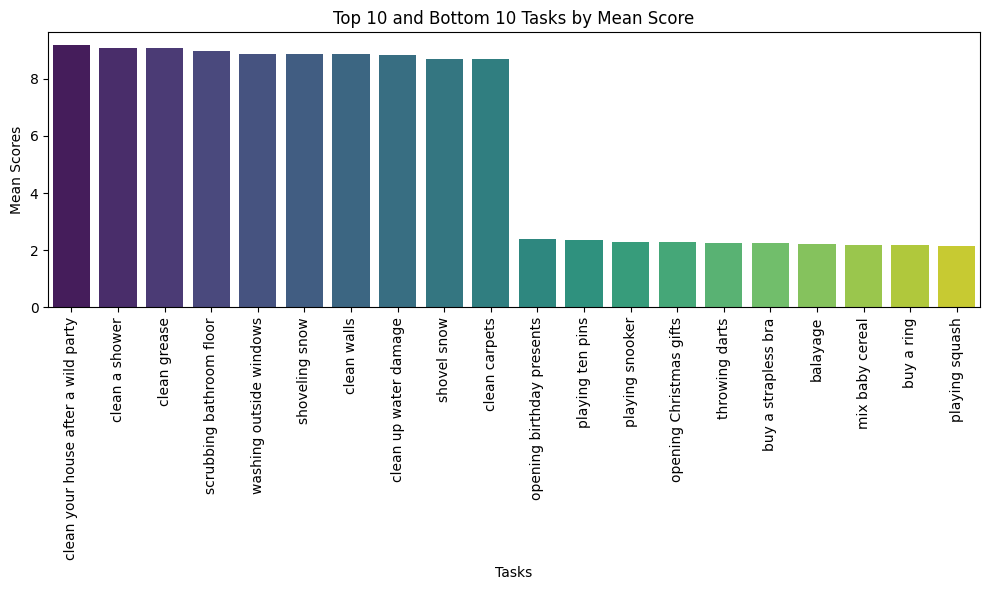

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns

# Example dictionary of tasks and mean scores
# task_scores = sorted_tasks

# Sorting the dictionary by score in descending order
# sorted_tasks = sorted(task_scores.items(), key=lambda x: x[1], reverse=True)

# Extracting top 5 and bottom 5 tasks
top_5_tasks = sorted_tasks[:10]
bottom_5_tasks = sorted_tasks[-10:]

# Combining top 5 and bottom 5 for plotting
plot_data = top_5_tasks + bottom_5_tasks

# Separating tasks and scores for plotting
tasks, scores = zip(*plot_data)

# Creating a colorful plot
plt.figure(figsize=(10, 6))
sns.barplot(x=tasks, y=scores, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Tasks')
plt.ylabel('Mean Scores')
plt.title('Top 10 and Bottom 10 Tasks by Mean Score')
plt.tight_layout()
plt.show()


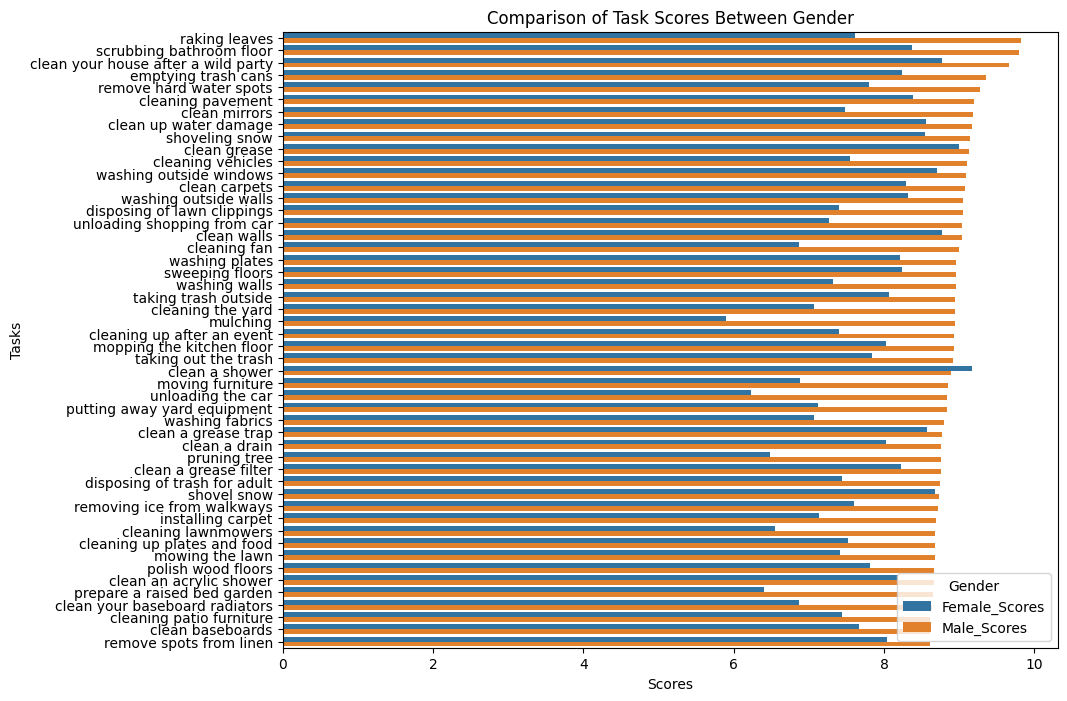

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json

# Load the JSON files
with open('BEHAVIOR1kData/survey_analysis/male.json', 'r') as file:
    female_data = json.load(file)

with open('BEHAVIOR1kData/survey_analysis/female.json', 'r') as file:
    male_data = json.load(file)

# Convert to DataFrames
female_df = pd.DataFrame(female_data, columns=['Tasks', 'Female_Scores'])
male_df = pd.DataFrame(male_data, columns=['Tasks', 'Male_Scores'])

# Merging the DataFrames based on Tasks to ensure that we are comparing the same tasks
merged_df = pd.merge(female_df, male_df, on='Tasks', how='inner')

# Sorting the merged DataFrame based on Female_Scores in descending order
merged_df_sorted = merged_df.sort_values(by='Male_Scores', ascending=False)
merged_df_sorted=merged_df_sorted.head(50)

# Creating a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(data=merged_df_sorted.melt(id_vars='Tasks', var_name='Income', value_name='Scores'),
            x='Scores', y='Tasks', hue='Income')
plt.title('Comparison of Task Scores Between Gender')
plt.xlabel('Scores')
plt.ylabel('Tasks')
plt.legend(title='Gender')
plt.show()


# ATUS TIME

In [4]:
import pandas as pd
atus_summary_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atussum-2021/atussum_2021.csv', header=0)

# ATUS WB

### Filter

In [5]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atusrost-2021/atusrost_2021.csv')

# Group by 'TUCASEID' and count the unique 'TULINENO' entries for each 'TUCASEID'
household_counts = df.groupby('TUCASEID')['TULINENO'].nunique().reset_index()

# Rename columns to reflect the data
household_counts.columns = ['TUCASEID', 'Number of Household Members']

# Save the result to a new CSV file
# household_counts.to_csv('household_members_ATUS.csv', index=False)

## Filter by Sex, Income Range, Age Range, Race, Number of Household Children, 

In [7]:

sex_dict = {
    'male': 1,
    'female': 2
}

sex="female"


income_mapping = {
    1:[0,5000],
    2:[5000,7499],
    3:[7500,9999],
    4:[10000,12499],
    5:[12500,14999],
    6:[15000,19999],
    7:[20000,24999],
    8:[25000,29999],
    9:[30000,34999],
    10:[35000,39999],
    11:[40000,49999],
    12:[50000,59999],
    13:[60000,74999],
    14:[75000,99999],
    15:[100000,149999],
    16:[150000,9999999999]
}

income= None #"1"

income_class=None #"high"

start_age = 0
end_age = 1000


race_dict = {
    'Asian Indian': 1,
    'Chinese': 2,
    'Filipino': 3,
    'Japanese': 4,
    'Korean': 5,
    'Vietnamese': 6,
    'Other': 7
}
race_name = None #'Chinese'


# Sex


if sex:
    sex_number = sex_dict[sex]
    atus_summary_df=atus_summary_df[atus_summary_df['TESEX'] == sex_number]



# Income Claasification by family member threshold + poverty line 2021
if income_class:   
    # Load the data
    atuscps_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atuscps-2021/atuscps_2021.csv')
    household_members_df = household_counts
    # pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/household_members_ATUS.csv')
    thresh_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/thresholds.csv')

    # Merge atuscps_df with household_members_df to get the number of members for each household
    atuscps_df = atuscps_df.merge(household_members_df, on='TUCASEID')

    # Function to classify income based on HEFAMINC, number of members, and thresholds
    def classify_income(row, thresh_df):
        income_code = row['HEFAMINC']
        members = row['Members']
        
        # Map the income code to a range using income_mapping
        lower_limit, upper_limit = income_mapping[income_code]

        # Find the appropriate threshold for the number of members
        if members >= 9:  # Assuming last row in thresh_df is for 5 and above
            thresh_row = thresh_df.iloc[-1]
        else:
            thresh_row = thresh_df[thresh_df['Size'] == members].iloc[0]

        # # Classify income
        # if lower_limit==0:
        #     return 'low'
        # else:
        # Determine if it's mid based on the mapping and thresholds
        low_thresh = thresh_row['poverty']
        high_thresh = thresh_row['high']
        if upper_limit <= low_thresh:
            return 'low'
        elif lower_limit >= high_thresh:
            return 'high'
        else:
            return 'mid'

    # Apply the classification function
    atuscps_df['Income Classification'] = atuscps_df.apply(classify_income, args=(thresh_df,), axis=1)

    atus_summary_df = atus_summary_df.merge(atuscps_df[['TUCASEID', 'Income Classification']], on='TUCASEID', how='left')

    atus_summary_df=atus_summary_df[atus_summary_df['Income Classification'] == "high"]

# Income

if income:
    # Load the data
    atuscps_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atuscps-2021/atuscps_2021.csv')

    # Merge atussum_df with classified_atuscps_df to get HEFAMINC value
    atus_summary_df = atus_summary_df.merge(atuscps_df[['TUCASEID', 'HEFAMINC']], on='TUCASEID', how='left')

    # Filter rows where HEFAMINC is 2
    atus_summary_df = atus_summary_df[atus_summary_df['HEFAMINC'] == income]



# Income Range -custom 

# Age Range
start_age = 0
# int(input("Enter the start age: "))
end_age = 1000
# int(input("Enter the end age: "))
atus_summary_df = atus_summary_df[(atus_summary_df['TEAGE'] >= start_age) & (atus_summary_df['TEAGE'] <= end_age)]


# Race


if race_name:
    race_number = race_dict[race_name]
    atus_summary_df=atus_summary_df[atus_summary_df['PTDTRACE'] == race_number]



# Number of Household Children - no direct way



In [8]:
import pandas as pd

# Load the datasets
atusact_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atusact-2021/atusact_2021.csv',header=0)
# atussum_df = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/atussum-2021/atussum_2021.csv')


# Merge the filtered atussum_df with atusact_df on TUCASEID
atusact_subset_df = pd.merge(atusact_df, atus_summary_df[['TUCASEID']], on='TUCASEID', how='inner')

wb = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/wbact-2021/wbact_2021.csv')

# Merge the datasets on TUCASEID and TUACTIVITY_N
merged_data = pd.merge(atusact_subset_df, wb, on=['TUCASEID', 'TUACTIVITY_N'])
merged_data

,TUCASEID,TUACTIVITY_N,TEWHERE,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TRTEC_LN,TRTHH_LN,TRTNOHH_LN,TRTOHH_LN,...,WUINTERACT,WUMEANING,WUPAIN,WUPNORD,WUSAD,WUSADORD,WUSTRESS,WUSTRORD,WUTIRED,WUTRDORD
0,20210301210166,3,3,0,-1,0,0,-1,-1,-1,...,2,4,2,3,3,5,3,1,4,2
1,20210301210166,9,1,0,-1,0,0,-1,-1,-1,...,1,4,0,3,0,5,0,1,2,2
2,20210301210166,11,7,0,-1,0,0,-1,-1,-1,...,1,4,0,3,0,5,2,1,0,2
3,20210301210218,2,1,0,-1,0,-1,-1,-1,-1,...,1,6,0,1,0,3,4,4,6,5
4,20210301210218,5,1,0,-1,0,-1,-1,-1,-1,...,2,0,0,1,0,3,0,4,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11086,20211212212502,5,1,0,-1,0,-1,-1,-1,-1,...,1,5,0,5,0,3,0,4,1,2
11087,20211212212502,10,1,0,-1,0,-1,-1,-1,-1,...,1,3,0,5,0,3,0,4,1,2
11088,20211212212567,3,1,240,240,0,-1,240,-1,240,...,1,3,3,5,5,4,6,3,5,1
11089,20211212212567,11,1,20,20,0,-1,20,-1,20,...,1,6,2,5,3,4,2,3,5,1


In [50]:


filtered_data = merged_data[(merged_data['WUHAPPY'] >= 0) & (merged_data['WUMEANING'] >= 0)]

# Group by 'TRCODE' and calculate the mean for 'WUHAPPY' and 'WUMEANING'
mean_values = filtered_data.groupby('TRCODE')[['WUHAPPY', 'WUMEANING']].mean().reset_index()


activity_time = pd.read_csv('/Users/ruchiraray/Documents/UT Austin/Soc-HHR/BEHAVIOR1kData/survey_analysis/activity_time_2021_mid.csv')

# Ensure the TRCODE and Activity Code are of the same type, adjust as necessary
activity_time['Activity Code'] = activity_time['Activity Code'].astype(int)

# Merge the DataFrames on the appropriate columns
merged_data_with_activities = pd.merge(mean_values, activity_time, left_on='TRCODE', right_on='Activity Code')

# Select and rename the columns as needed
final_data = merged_data_with_activities[['TRCODE', 'WUHAPPY', 'WUMEANING', 'Activity']]

